# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#OpenWeather Key

units = "Imperial"

query_url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"
query_url
weather_data = []
print("Beginning Data Retrieval ")
print("----------------------------")
for city in cities:
    city_url = query_url + "&q=" + city
    response = requests.get(city_url)
    try:
        response_json = response.json()
        #print(response_json)
        lat = response_json['coord']['lat']
        lon = response_json['coord']['lon']
        temp_max = response_json['main']['temp_max']
        humidity = response_json['main']['humidity']
        cloudiness = response_json['clouds']['all']
        wind_speed = response_json['wind']['speed']
        country = response_json['sys']['country']
        date = response_json['dt']
        weather_data.append({"City": city,
                    "Lat": lat,
                    "Lng": lon,
                    "Max Temp": temp_max,
                    "Humidity": humidity,
                    "Cloudiness": cloudiness,
                    "Wind Speed": wind_speed,
                    "Country": country,
                    "Date": date})
        print(f"Processing : {city}")
    except:
        print("City not found. Skipping...")
        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval 
----------------------------
Processing : jamestown
City not found. Skipping...
City not found. Skipping...
Processing : kambove
Processing : nanortalik
Processing : lebu
Processing : busselton
Processing : madingou
Processing : barkhan
Processing : bethel
Processing : vaini
Processing : grand gaube
Processing : constitucion
Processing : pemba
Processing : khatanga
Processing : dengfeng
Processing : cusco
Processing : kosh-agach
Processing : rikitea
Processing : vilyuysk
Processing : albany
Processing : bluff
Processing : aswan
Processing : flin flon
Processing : mataura
Processing : kavaratti
Processing : east london
Processing : makaha
Processing : cockburn town
Processing : ushuaia
Processing : trincomalee
Processing : hobart
Processing : duncan
Processing : muros
Processing : rincon
Processing : caborca
Processing : qaanaaq
Processing : kerchevskiy
Processing : la ronge
Processing : mar del plata
Processing : atuona
Processing : pacific grove
Processing : 

Processing : shingu
Processing : tuatapere
Processing : port hardy
Processing : champerico
Processing : bayir
Processing : dicabisagan
Processing : puerto ayora
Processing : grand-lahou
Processing : kattivakkam
City not found. Skipping...
Processing : westport
Processing : bugry
Processing : cairns
Processing : molokovo
Processing : leningradskiy
Processing : waddan
Processing : yaan
Processing : micheweni
Processing : salalah
Processing : ninghai
Processing : babai
Processing : duminichi
Processing : tilichiki
Processing : bandar-e lengeh
Processing : lata
Processing : tautira
Processing : lasa
Processing : broken hill
Processing : ahipara
Processing : kruisfontein
Processing : sitka
City not found. Skipping...
Processing : hamilton
Processing : mascote
Processing : kaeo
Processing : uarini
Processing : boende
Processing : morant bay
Processing : corsicana
Processing : noumea
Processing : tacuarembo
Processing : pioner
Processing : ostrovnoy
Processing : pisco
Processing : vao
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_data_df = pd.DataFrame(weather_data)
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [15]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,28.40,68,75,23.04,US,1587519044
1,kambove,-10.88,26.60,56.88,64,92,4.34,CD,1587519044
2,nanortalik,60.14,-45.24,37.36,79,54,15.39,GL,1587519044
3,lebu,-37.62,-73.65,54.46,61,100,4.88,CL,1587519135
4,busselton,-33.65,115.33,70.00,68,100,17.13,AU,1587519100


In [16]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.747478,17.421023,60.357443,68.149912,50.783069,7.844250,1.587519e+09
std,33.014254,88.372186,19.724539,20.903288,38.520068,5.989095,8.883523e+01
min,-54.800000,-175.200000,-0.400000,7.000000,0.000000,0.360000,1.587519e+09
25%,-7.290000,-60.895000,44.600000,57.500000,6.500000,3.410000,1.587519e+09
50%,24.270000,25.850000,64.400000,73.000000,50.000000,6.580000,1.587519e+09
75%,47.775000,87.560000,76.845000,83.000000,90.000000,10.290000,1.587519e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,46.080000,1.587519e+09


In [18]:
city_data_df.to_csv(output_data_file, index_label='City_ID')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

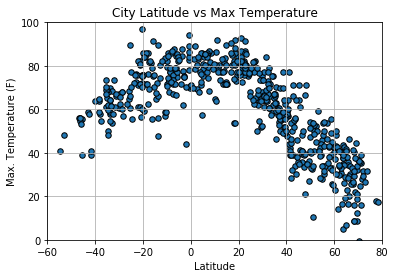

In [19]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

## Latitude vs. Humidity Plot

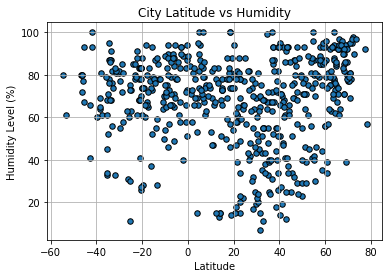

In [32]:
#Create a Scatter Plot for Lattitude vs Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS HUM.png')

## Latitude vs. Cloudiness Plot

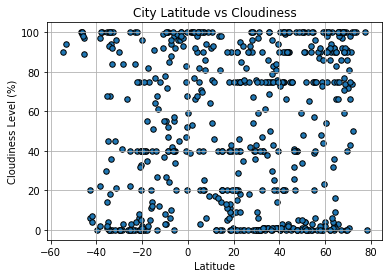

In [33]:
#Create a Scatter Plot for Lattitude vs Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS CLOUD.png')

## Latitude vs. Wind Speed Plot

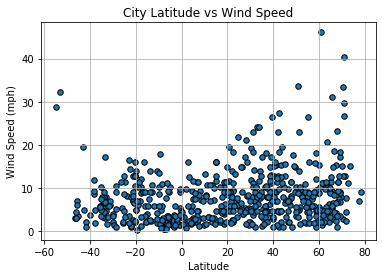

In [34]:
#Create a Scatter Plot for Lattitude vs WindSpeed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS WIND.png')

## Linear Regression

In [40]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(x_values,y_values,feature,xy_coord,x_lim,y_lim):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,xy_coord,fontsize=15,color="red")
    plt.ylim(y_lim)
    plt.xlim(x_lim)
    plt.ylabel(feature)
    plt.xlabel('Latitude')
   

In [25]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>0.01]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<-0.01]

print(northern_hemisphere.head())
southern_hemisphere.head()

          City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0    jamestown  42.10  -79.24     28.40        68          75       23.04   
2   nanortalik  60.14  -45.24     37.36        79          54       15.39   
6      barkhan  29.90   69.53     75.33        19          43        2.08   
7       bethel  41.37  -73.41     42.01        48          20        9.17   
12    khatanga  71.97  102.50     31.66        98          50        7.81   

   Country        Date  
0       US  1587519044  
2       GL  1587519044  
6       PK  1587519314  
7       US  1587519314  
12      RU  1587519156  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,kambove,-10.88,26.60,56.88,64,92,4.34,CD,1587519044
3,lebu,-37.62,-73.65,54.46,61,100,4.88,CL,1587519135
4,busselton,-33.65,115.33,70.00,68,100,17.13,AU,1587519100
5,madingou,-4.15,13.55,71.71,86,96,1.43,CG,1587519313
8,vaini,-21.20,-175.20,82.40,78,75,9.17,TO,1587519314


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

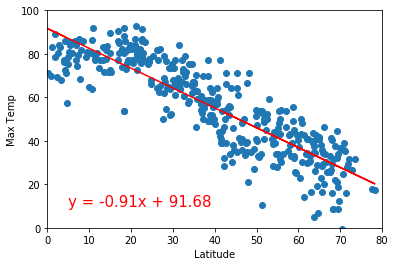

In [59]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Max Temp']
#print(y_values)
xy_coord = (5,10)
x_lim = (0,80)
y_lim = (0,100)
linear_reg(x_values,y_values,'Max Temp',xy_coord,x_lim,y_lim)
plt.savefig("NORTH MAX TEMP VS LAT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

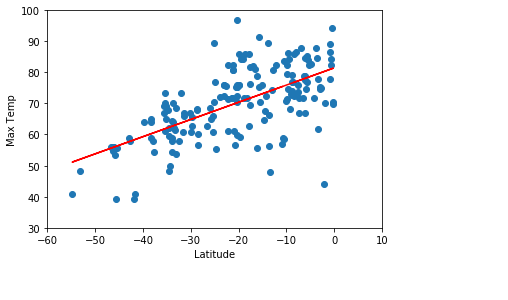

In [62]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Max Temp']
#print(y_values)
xy_coord = (6,10)
x_lim = (-60,10)
y_lim = (30,100)
linear_reg(x_values,y_values,'Max Temp',xy_coord,x_lim,y_lim)
plt.savefig("SOUTH MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

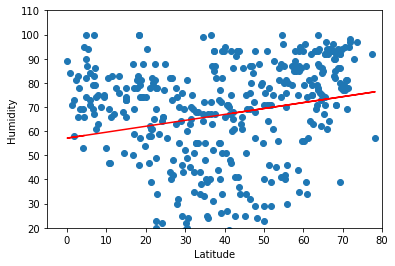

In [83]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Humidity']
#print(y_values)
xy_coord = (6,10)
x_lim = (-5,80)
y_lim = (20,110)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

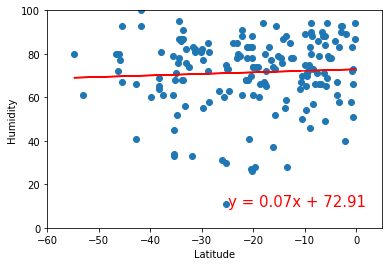

In [110]:
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Humidity']
#print(y_values)
xy_coord = (-25,10)
x_lim = (-60,5)
y_lim = (0,100)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

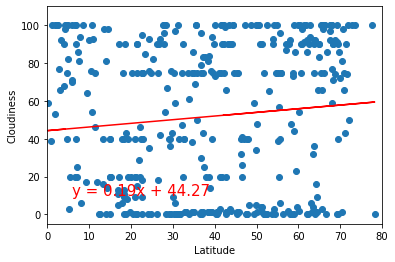

In [101]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Cloudiness']
#print(y_values)
xy_coord = (6,10)
x_lim = (0,80)
y_lim = (-5,110)
linear_reg(x_values,y_values,'Cloudiness',xy_coord,x_lim,y_lim)
plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

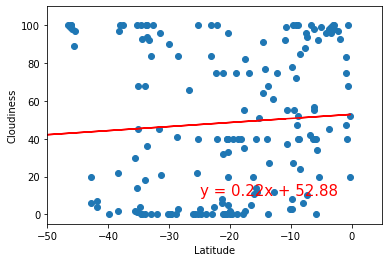

In [107]:
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Cloudiness']
#print(y_values)
xy_coord = (-25,10)
x_lim = (-50,5)
y_lim = (-5,110)
linear_reg(x_values,y_values,'Cloudiness',xy_coord,x_lim,y_lim)
plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

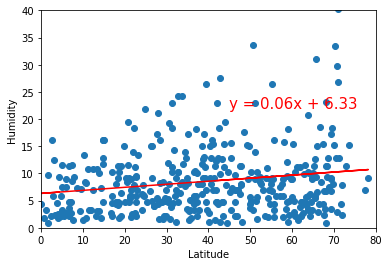

In [108]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Wind Speed']
#print(y_values)
xy_coord = (45,22)
x_lim = (0,80)
y_lim = (0,40)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

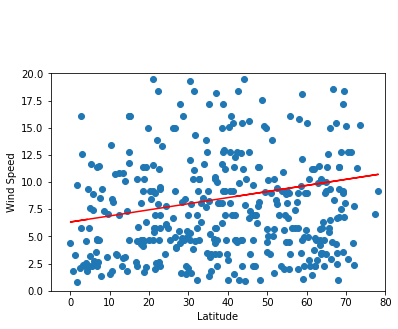

In [124]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Wind Speed']
#print(y_values)
xy_coord = (-10,25)
x_lim = (-5,80)
y_lim = (0,20)
linear_reg(x_values,y_values,'Wind Speed',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")